In [166]:
%matplotlib inline
import matplotlib.pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import pydotplus

In [167]:
df = pd.read_csv('train_data_tree.csv')

In [168]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [169]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [170]:
X_train = df.drop(['num'], axis=1)

In [171]:
y_train =df['num']

In [172]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [173]:
N = clf.tree_.n_node_samples

In [174]:
en = clf.tree_.impurity

In [175]:
print(N, en)
en[0]-((N[1]/N[0])*en[1] + (N[4]/N[0])*en[4])
# 0.996-((157/238)*0.903 + (81/238)*0.826)

[238 157  53 104  81  16  65] [0.99587    0.90271134 0.61219613 0.97315604 0.82562653 0.954434
 0.77934984]


0.11939340343891591

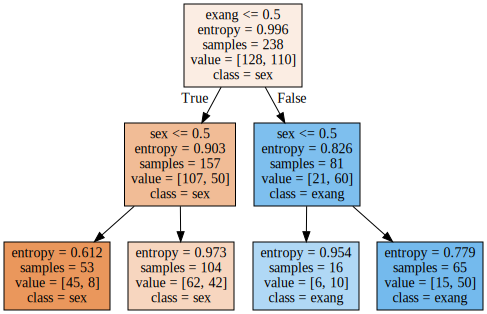

In [176]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)
import os
os.environ['PATH'] +=os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

graph = Source(tree.export_graphviz(clf, out_file=None, 
                                    feature_names=list(X_train), 
                                    class_names=['sex', 'exang'], 
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

-------------------------

In [177]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris

In [178]:
iris = load_iris()
x = iris.data
y = iris.target

In [179]:
params={'min_samples_split': range(2,10),
        'max_depth' : range(1,10),
        'min_samples_leaf' : range(1,10)
       }

In [180]:
clf = DecisionTreeClassifier()

In [181]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
search = GridSearchCV(clf, params, cv=5)

In [183]:
search.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         

In [184]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [185]:
search = RandomizedSearchCV(clf, params, cv=5)

In [186]:
search.fit(x,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [187]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

-----

In [246]:
df = pd.read_csv('training_mush.csv')
X_test = pd.read_csv('testing_mush.csv')
y_true = pd.read_csv('testing_y_mush.csv')

In [240]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [212]:
X = df.drop('class', axis=1)
y = df['class']

In [241]:
df1.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [213]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
clf_rf = RandomForestClassifier(random_state=0)

In [226]:
params = {'n_estimators':[10, 20, 30, 40, 50],'max_depth':range(1,14,2), 'min_samples_leaf': range(1,8), 'min_samples_split':range(2,11,2)}

In [227]:
gr = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1,verbose=1)

In [228]:
gr.fit(X,y)

Fitting 3 folds for each of 1225 candidates, totalling 3675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 3675 out of 3675 | elapsed:   20.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [229]:
gr.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [231]:
best_clf = gr.best_estimator_

In [232]:
imp = best_clf.feature_importances_

In [233]:
imp

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [235]:
fi_df = pd.DataFrame({'features':list(X), 'feature_importances': imp})

In [238]:
fi_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [243]:
y_pred = best_clf.predict(X_test)

In [244]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [248]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

---

In [254]:
df = pd.read_csv('invasion.csv')
X_test = pd.read_csv('operative_information.csv')

In [255]:
df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [266]:
X = df.drop('class', axis=1)
y = df['class']
y.nunique()

3

In [257]:
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [277]:
clf_rf = RandomForestClassifier(random_state=0)

In [278]:
params = {'n_estimators':[10, 20, 30, 40, 50],'max_depth':range(1,14,2), 'min_samples_leaf': range(1,8), 'min_samples_split':range(2,11,2)}

In [279]:
gr = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1,verbose=1)
gr.fit(X,y)

Fitting 3 folds for each of 1225 candidates, totalling 3675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1444 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 3675 out of 3675 | elapsed:   11.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [280]:
gr.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [281]:
best_clf = gr.best_estimator_

In [282]:
y_pred = best_clf.predict(X_test)


In [283]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [293]:
fi_df = pd.DataFrame({'features':list(X), 'fi': best_clf.feature_importances_}).sort_values('fi', ascending=False)

In [294]:
fi_df

,features,fi
5,volume,0.310467
2,speed,0.236438
3,brightness,0.211260
0,g_reflection,0.136857
1,i_reflection,0.104978
4,time_of_observance,0.000000


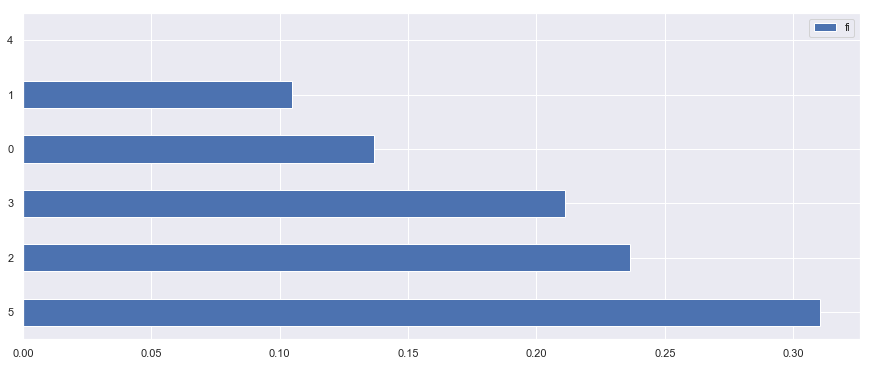

In [295]:
fi_df.plot(kind='barh')

---

In [300]:
df = pd.read_csv('iris.csv')

In [307]:
%%timeit
df.apply('mean')

546 µs ± 5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [308]:
%%timeit
df.mean(axis=0)

203 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [309]:
%%timeit
df.describe().loc['mean']

10.4 ms ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [310]:
%%timeit
df.apply(np.mean)

1.08 ms ± 4.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
